# This notebook calculates the species richness and alpha biodiversity indices (shannon index and simpson index) with window size equal to 5 (spatial resolution 150m x 150m for PRISMA)

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae 
from scipy import stats
import seaborn as sns

In [2]:
# Set some directories. Here we use absolute directories. 
cwd = 'c:\\Users\\m1865\\Desktop\\Ticino'
cwd_Field = cwd + '\\FieldData'
cwd_Field_DataMerged = cwd_Field + '\\Field Dataset Merged'
cwd_Field_DataMerged_CSV_Indices = cwd_Field_DataMerged + "\\CSV Biodiversity Indices"
cwd_Sentinel = cwd + "\\ProcessedData"
cwd_Sentinel_Result = cwd + "\\Results"
cwd_Field_Data1 = cwd_Field + '\\Field Dataset 1'
cwd_Field_Data1_CSV = cwd_Field_Data1 + "\\CSV"

In [3]:
# Get the name of all the rasters in our folder
raster_Names = []
for item in [name.split('.')[0] for name in os.listdir(cwd_Sentinel)]:
    item = item + "Cropped"
    if item not in raster_Names:
        raster_Names.append(item)
raster_Names

['2022 06Cropped', '2022 09Cropped']

In [4]:
window_Size = '50m'
df_Raster_6 = pd.read_csv(cwd_Sentinel_Result + "\\" + raster_Names[0] + "\\AlphaDiversity" + window_Size + ".csv", sep = '\t')
df_Raster_9 = pd.read_csv(cwd_Sentinel_Result + "\\" + raster_Names[1] + "\\AlphaDiversity" + window_Size + ".csv", sep = '\t')
df_Raster_6.head()

,Plot,Species_Richness,Fisher,Shannon,Simpson
0,FOR01,7.80,0,1.829312,0.81264
1,FOR02,5.30,0,1.340549,0.67312
2,FOR03,4.05,0,1.196586,0.64752
3,FOR04,3.15,0,0.904839,0.52544
4,FOR05,4.30,0,1.092031,0.58816


In [5]:
df_Raster_Merge = pd.merge(df_Raster_6[['Plot','Species_Richness','Shannon','Simpson']],df_Raster_9[['Plot','Species_Richness','Shannon','Simpson']], on = 'Plot', suffixes= [' June', ' Sep'])
df_Raster_Merge.head()

,Plot,Species_Richness June,Shannon June,Simpson June,Species_Richness Sep,Shannon Sep,Simpson Sep
0,FOR01,7.80,1.829312,0.81264,6.95,1.537779,0.72448
1,FOR02,5.30,1.340549,0.67312,4.10,0.967272,0.50336
2,FOR03,4.05,1.196586,0.64752,4.80,1.092031,0.55936
3,FOR04,3.15,0.904839,0.52544,5.65,1.373065,0.69072
4,FOR05,4.30,1.092031,0.58816,5.25,1.331221,0.66512


In [6]:
df_Raster_Merge.columns = ['Plot','Raster Species Richness June','Raster Shannon June','Raster Simpson June','Raster Species Richness Sep','Raster Shannon Sep','Raster Simpson Sep']
df_Raster_Merge.head()

,Plot,Raster Species Richness June,Raster Shannon June,Raster Simpson June,Raster Species Richness Sep,Raster Shannon Sep,Raster Simpson Sep
0,FOR01,7.80,1.829312,0.81264,6.95,1.537779,0.72448
1,FOR02,5.30,1.340549,0.67312,4.10,0.967272,0.50336
2,FOR03,4.05,1.196586,0.64752,4.80,1.092031,0.55936
3,FOR04,3.15,0.904839,0.52544,5.65,1.373065,0.69072
4,FOR05,4.30,1.092031,0.58816,5.25,1.331221,0.66512


In [7]:
df_Association = pd.read_csv(cwd_Field_Data1_CSV + "\\FieldData1 Valid Association.csv")
df_Association.head()

,Plot,Association
0,FOR01,Oak_hornbeam_humid
1,FOR02,Prunus
2,FOR03,Prunus
3,FOR04,Oak_open_canopy
4,FOR05,Oak_open_canopy


In [8]:
df_Raster_Merge_1 = pd.merge(df_Raster_Merge.iloc[0:63,:],df_Association,on='Plot')
df_Raster_Merge_1.tail()

,Plot,Raster Species Richness June,Raster Shannon June,Raster Simpson June,Raster Species Richness Sep,Raster Shannon Sep,Raster Simpson Sep,Association
58,FOR78,2.65,0.706434,0.45040,3.75,1.148668,0.64784,Prunus
59,FOR79,4.65,1.171058,0.63632,5.50,1.449959,0.72032,Mixed deciduous
60,FOR80,3.65,0.929300,0.51584,2.95,0.794677,0.46944,Mixed deciduous
61,FOR81,5.00,1.257146,0.63056,4.00,1.058752,0.57120,Mixed deciduous
62,FOR82,4.85,1.373762,0.71648,4.65,1.266519,0.65968,Mixed deciduous


## Species Richness

In [9]:
df_Field_Richness = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid SpeciesRichness.csv")
df_Field_Richness.head()

,Plot,Field Species Richness
0,FOR01,5
1,FOR02,7
2,FOR03,4
3,FOR04,2
4,FOR05,1


In [10]:
df_Field_Richness_1 = df_Field_Richness.copy().iloc[0:63,:]
df_Field_Richness_1.tail()

,Plot,Field Species Richness
58,FOR78,2
59,FOR79,4
60,FOR80,3
61,FOR81,4
62,FOR82,4


In [11]:
df_Richness_1 = pd.merge(df_Field_Richness_1,df_Raster_Merge_1[['Plot','Association','Raster Species Richness June','Raster Species Richness Sep']],on = 'Plot')
df_Richness_1.head()

,Plot,Field Species Richness,Association,Raster Species Richness June,Raster Species Richness Sep
0,FOR01,5,Oak_hornbeam_humid,7.80,6.95
1,FOR02,7,Prunus,5.30,4.10
2,FOR03,4,Prunus,4.05,4.80
3,FOR04,2,Oak_open_canopy,3.15,5.65
4,FOR05,1,Oak_open_canopy,4.30,5.25


In [12]:
df_Richness_1.describe()

,Field Species Richness,Raster Species Richness June,Raster Species Richness Sep
count,63.000000,63.000000,63.000000
mean,3.507937,4.530159,5.334127
std,1.865415,1.497620,1.935030
min,1.000000,2.050000,1.000000
25%,2.000000,3.550000,4.100000
50%,3.000000,4.400000,5.650000
75%,4.000000,5.450000,6.650000
max,8.000000,8.500000,9.800000


In [13]:
df_Richness_1_Asso = df_Richness_1.copy().sort_values('Association')
df_Richness_1_Asso

,Plot,Field Species Richness,Association,Raster Species Richness June,Raster Species Richness Sep
20,FOR21,4,Alder,6.55,6.80
19,FOR20,3,Alder,6.30,8.10
35,FOR55,2,Alder,6.65,8.50
7,FOR08,4,Alder,4.00,5.85
36,FOR56,2,Alder,7.25,7.50
...,...,...,...,...,...
24,FOR25,1,Pine,4.45,5.60
30,FOR31,2,Pine,3.25,4.00
58,FOR78,2,Prunus,2.65,3.75
2,FOR03,4,Prunus,4.05,4.80


In [14]:
list_Plot_Outlier = ['FOR72','FOR59','FOR51', 'FOR69','FOR29']
df_Richness_1_Asso_NoOut = df_Richness_1_Asso.copy()
# Drop those outliers! 
df_Richness_1_Asso_NoOut = df_Richness_1_Asso_NoOut[~df_Richness_1_Asso_NoOut['Plot'].isin(list_Plot_Outlier)]
df_Richness_1_Asso_NoOut.describe()

,Field Species Richness,Raster Species Richness June,Raster Species Richness Sep
count,58.000000,58.000000,58.000000
mean,3.568966,4.568966,5.367241
std,1.826818,1.516888,1.921041
min,1.000000,2.050000,1.000000
25%,2.000000,3.562500,4.100000
50%,4.000000,4.400000,5.625000
75%,4.000000,5.475000,6.675000
max,8.000000,8.500000,9.800000


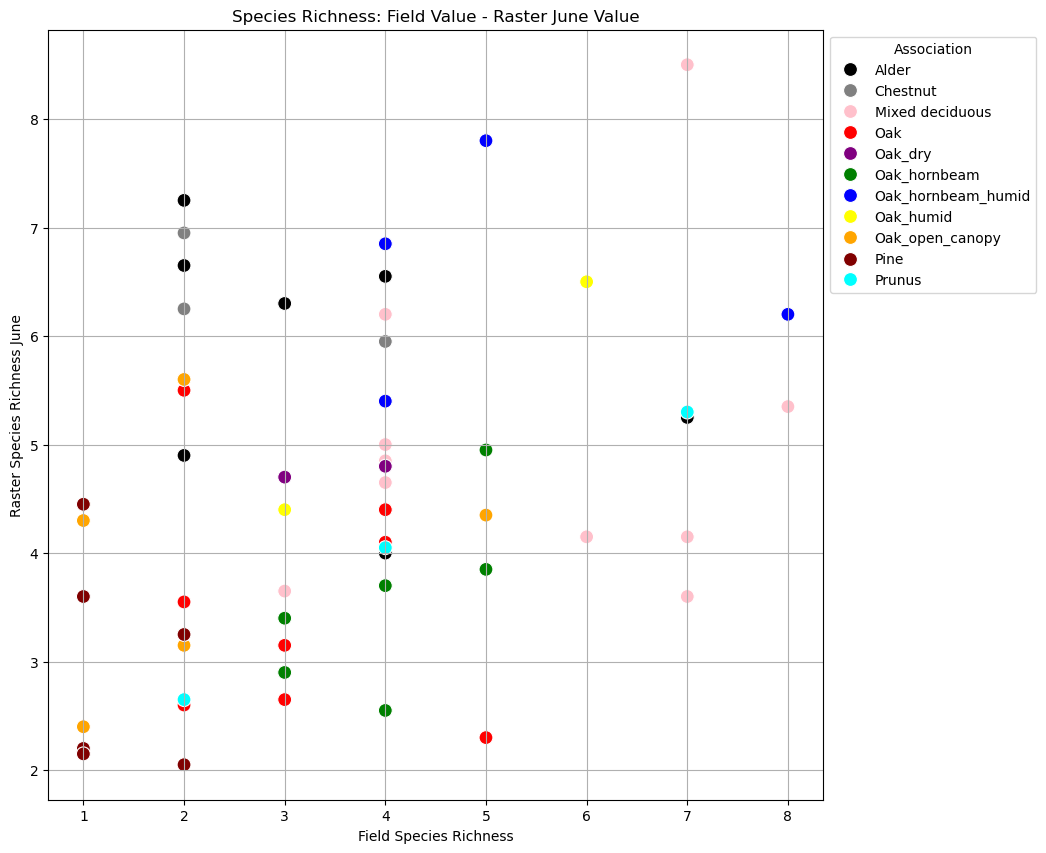

In [15]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness June', data = df_Richness_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster June Value')
plt.show()

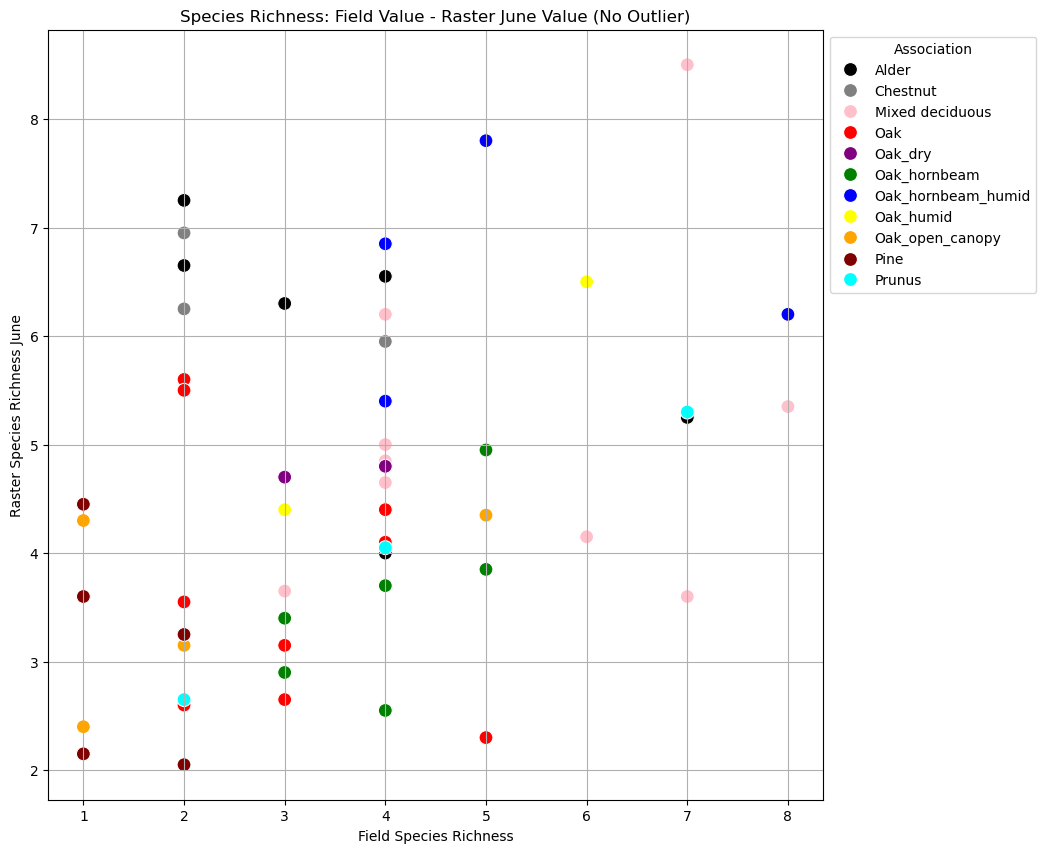

In [16]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness June', data = df_Richness_1_Asso_NoOut, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster June Value (No Outlier)')
plt.show()

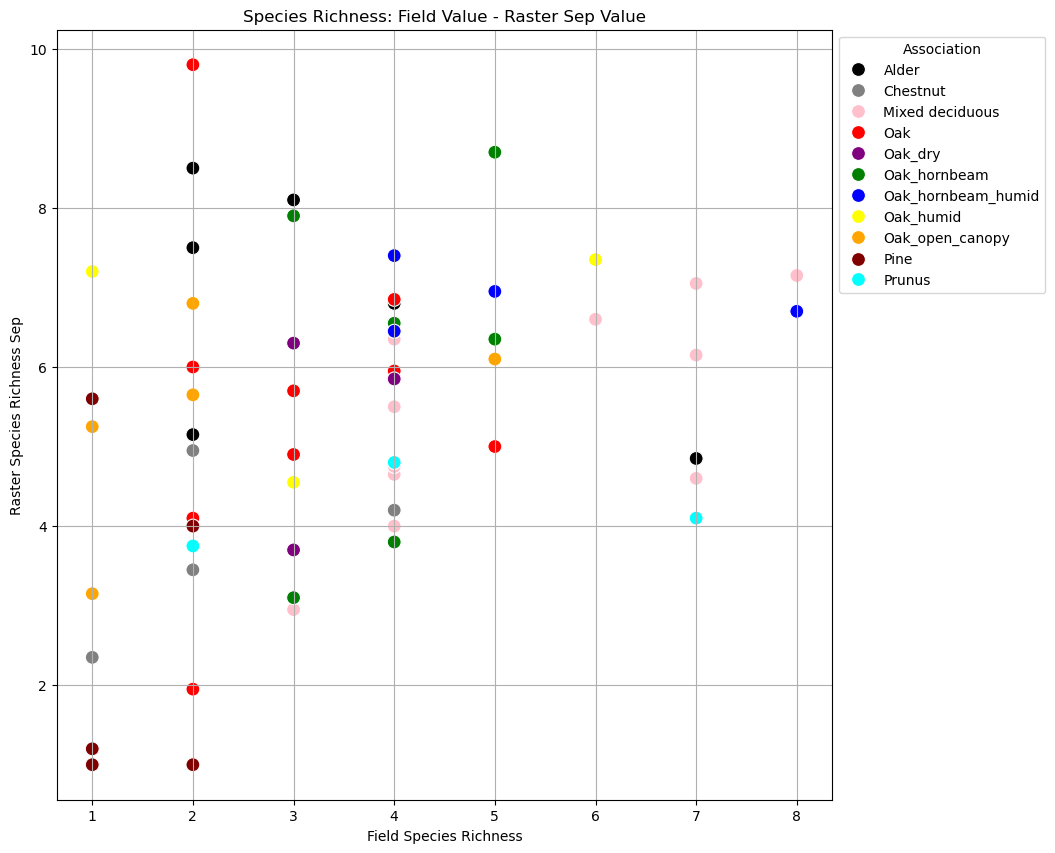

In [17]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness Sep', data = df_Richness_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster Sep Value')
plt.show()

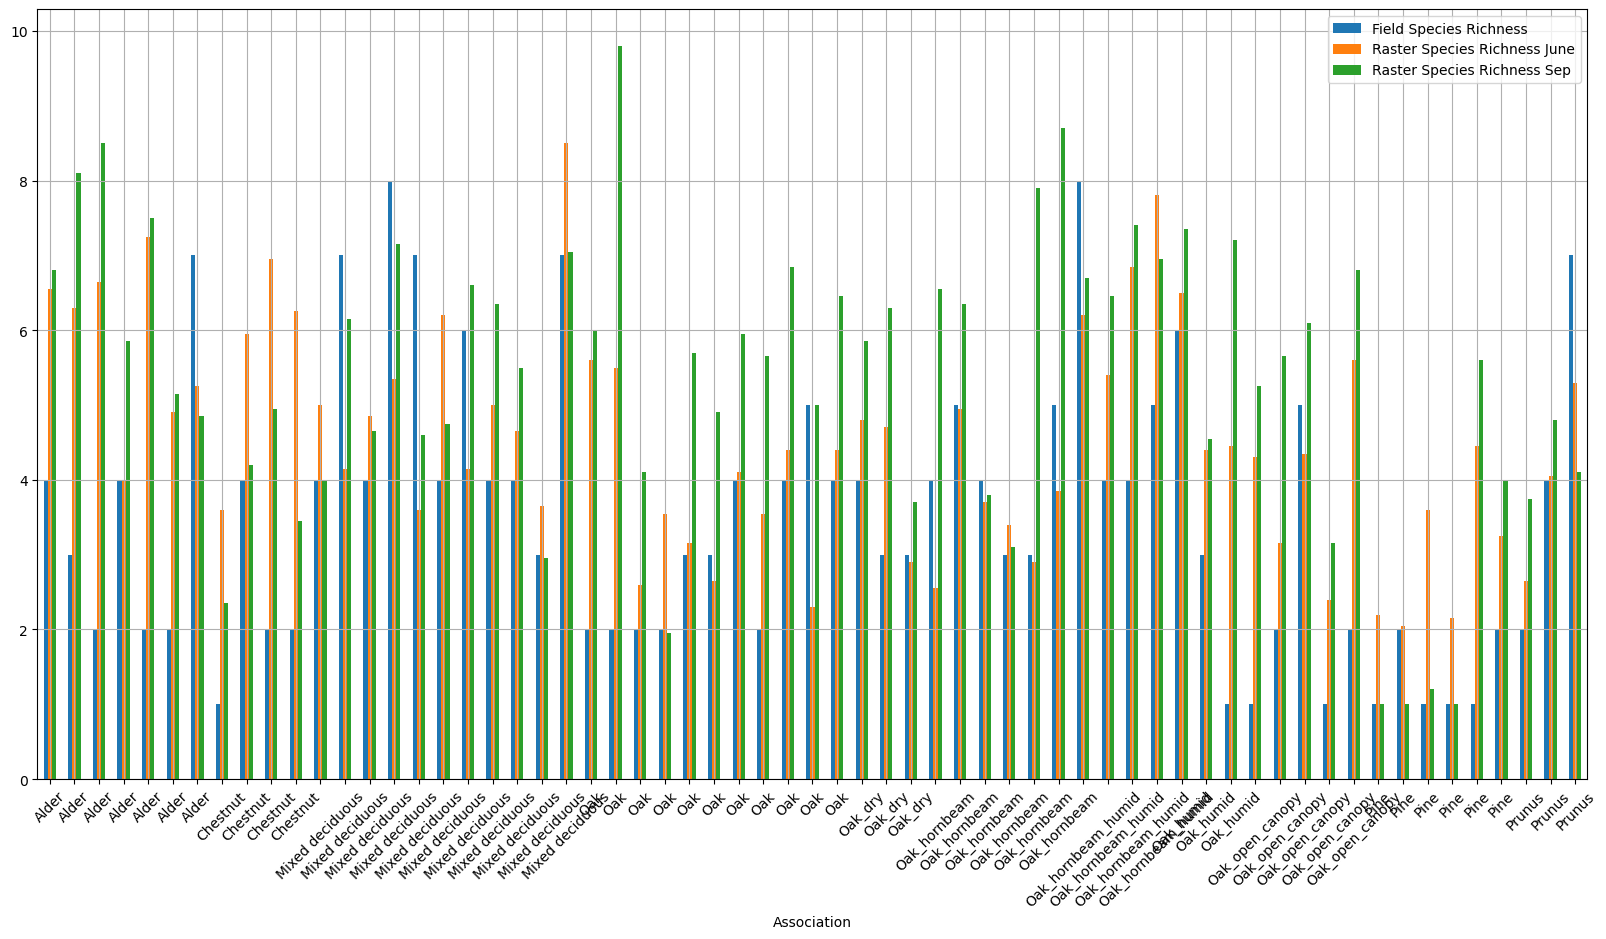

In [53]:
df_Richness_1_Asso.plot(x = 'Association', y = ['Field Species Richness','Raster Species Richness June', 'Raster Species Richness Sep'], kind = 'bar', figsize = (20,10))
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [18]:
from scipy.spatial import distance
from scipy.stats import kendalltau
distance.correlation(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])

0.6704263552291766

In [19]:
distance.correlation(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])

0.651211521290121

In [20]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-3.391699355301349
0.0009325341553728946
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!
The Pearson correlation coefficient is equal to 0.3295736447708232; the p value is 0.008347952516991108
Perfect! The Pearson correlation coefficient is considered statistically significant!


In [21]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1_Asso_NoOut['Field Species Richness'], df_Richness_1_Asso_NoOut['Raster Species Richness June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1_Asso_NoOut['Field Species Richness'], df_Richness_1_Asso_NoOut['Raster Species Richness June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-3.2073264541861093
0.0017392622429855654
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!
The Pearson correlation coefficient is equal to 0.33633191859999695; the p value is 0.009841582375390819
Perfect! The Pearson correlation coefficient is considered statistically significant!


In [22]:
r2_score(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])

-0.4204896262507365

In [23]:
mae(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])

1.7476190476190476

In [24]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-5.3929203852653185
3.3722963082775447e-07
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!
The Pearson correlation coefficient is equal to 0.34878847870987906; the p value is 0.005085821773381941
Perfect! The Pearson correlation coefficient is considered statistically significant!


In [25]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1_Asso_NoOut['Field Species Richness'], df_Richness_1_Asso_NoOut['Raster Species Richness Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1_Asso_NoOut['Field Species Richness'], df_Richness_1_Asso_NoOut['Raster Species Richness Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.1:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!" + str(pear.pvalue))

-5.166123578650899
1.026891018012484e-06
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!
The Pearson correlation coefficient is equal to 0.3330961689453186; the p value is 0.010619336214440892
Perfect! The Pearson correlation coefficient is considered statistically significant!


In [26]:
r2_score(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])

-1.3262652663331376

In [27]:
mae(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])

2.199206349206349

## Shannon

In [28]:
df_Field_Shannon = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid Shannon.csv")
df_Field_Shannon.head()

,Plot,Field Shannon
0,FOR01,1.267990
1,FOR02,1.604816
2,FOR03,0.534923
3,FOR04,0.474139
4,FOR05,0.000000


In [29]:
df_Field_Shannon_1 = df_Field_Shannon.copy().iloc[0:63,:]

In [30]:
df_Shannon_1 = pd.merge(df_Field_Shannon_1,df_Raster_Merge_1[['Plot','Association','Raster Shannon June','Raster Shannon Sep']],on = 'Plot')
df_Shannon_1.tail()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
58,FOR78,0.286836,Prunus,0.706434,1.148668
59,FOR79,1.344339,Mixed deciduous,1.171058,1.449959
60,FOR80,0.918320,Mixed deciduous,0.929300,0.794677
61,FOR81,1.301362,Mixed deciduous,1.257146,1.058752
62,FOR82,1.193337,Mixed deciduous,1.373762,1.266519


In [31]:
df_Shannon_1_Asso = df_Shannon_1.copy().sort_values('Association')
df_Shannon_1_Asso.tail()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
24,FOR25,0.000000,Pine,1.148215,1.202115
30,FOR31,0.146145,Pine,0.878001,0.498758
58,FOR78,0.286836,Prunus,0.706434,1.148668
2,FOR03,0.534923,Prunus,1.196586,1.092031
1,FOR02,1.604816,Prunus,1.340549,0.967272


In [32]:
df_Shannon_1_Asso.describe()

,Field Shannon,Raster Shannon June,Raster Shannon Sep
count,63.000000,63.000000,63.000000
mean,0.793971,1.156671,1.227642
std,0.519653,0.320956,0.495646
min,0.000000,0.491342,0.000000
25%,0.401475,0.913535,1.016177
50%,0.804448,1.163528,1.285801
75%,1.180566,1.393272,1.569142
max,1.794190,1.862367,2.076037


In [33]:
df_Shannon_1_Asso_NoZero = df_Shannon_1_Asso.copy()
df_Shannon_1_Asso_NoZero = df_Shannon_1_Asso_NoZero.loc[df_Shannon_1_Asso_NoZero['Field Shannon']!=0]
df_Shannon_1_Asso_NoZero.head()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
20,FOR21,0.942002,Alder,1.506328,1.715518
19,FOR20,0.886464,Alder,1.432090,1.905562
35,FOR55,0.276191,Alder,1.436454,1.850280
7,FOR08,0.804448,Alder,0.933227,1.350746
36,FOR56,0.482578,Alder,1.752002,1.799107


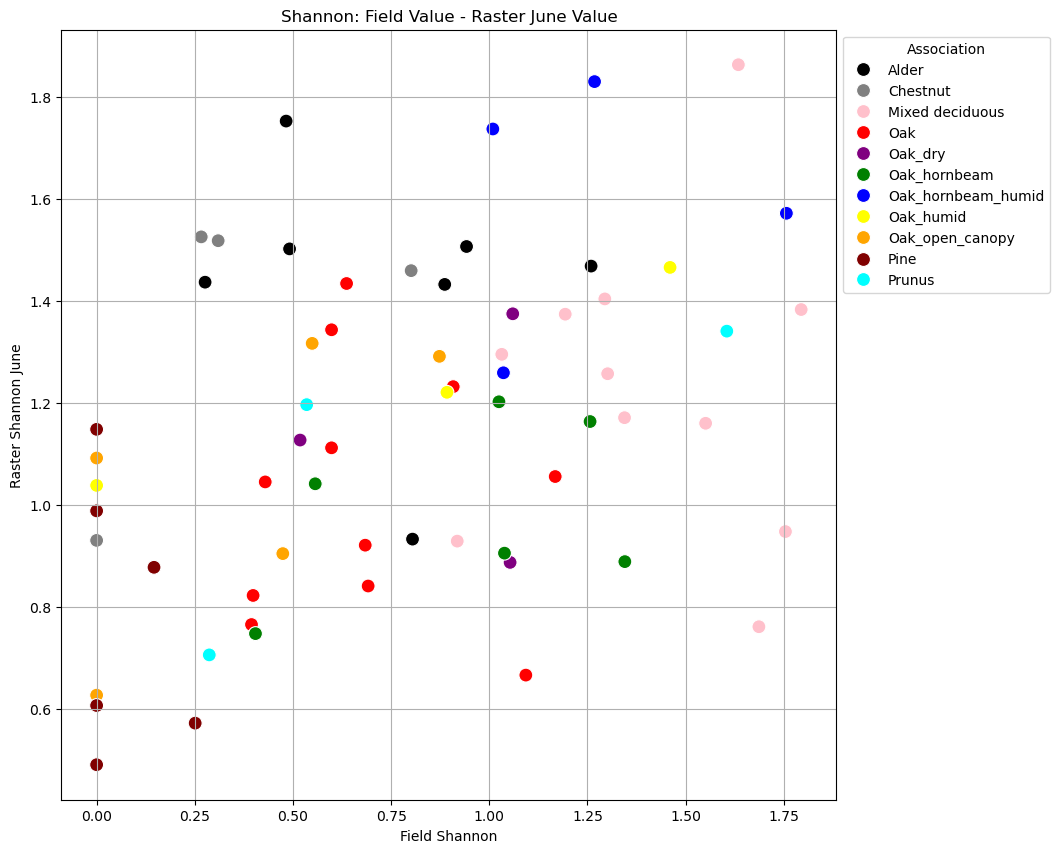

In [34]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Shannon',y = 'Raster Shannon June', data = df_Shannon_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Shannon: Field Value - Raster June Value')
plt.show()

In [35]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Shannon_1_Asso['Field Shannon'], df_Shannon_1_Asso['Raster Shannon June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Shannon_1_Asso['Field Shannon'], df_Shannon_1_Asso['Raster Shannon June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.1:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-4.713384521828801
6.434111261543991e-06
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!
The Pearson correlation coefficient is equal to 0.3803968469688722; the p value is 0.0021025353863407432
Perfect! The Pearson correlation coefficient is considered statistically significant!


In [36]:
r2_score(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

-0.4065937875900798

In [37]:
mae(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

0.508268387462285

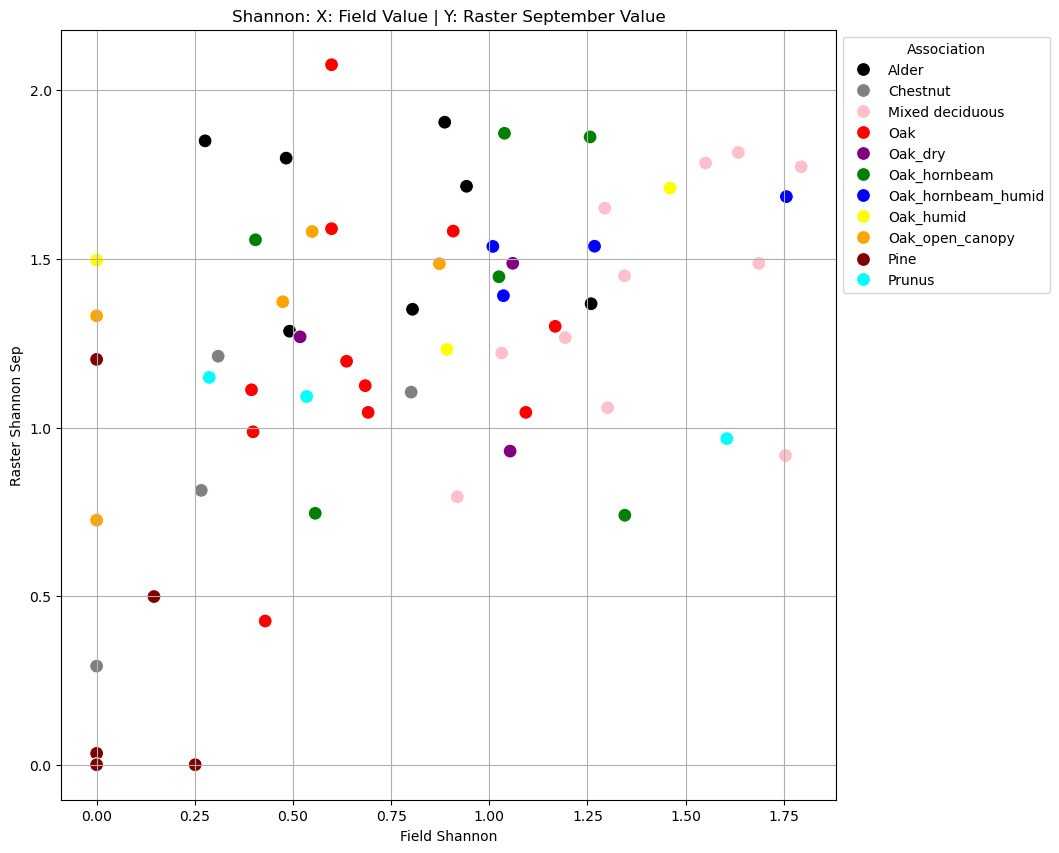

In [38]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Shannon',y = 'Raster Shannon Sep', data = df_Shannon_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Shannon: X: Field Value | Y: Raster September Value')
plt.show()

In [39]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Shannon_1_Asso['Field Shannon'], df_Shannon_1_Asso['Raster Shannon Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Shannon_1_Asso['Field Shannon'], df_Shannon_1_Asso['Raster Shannon Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-4.793246540791203
4.606758888882804e-06
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!
The Pearson correlation coefficient is equal to 0.4774898046200817; the p value is 7.586367518223427e-05
Perfect! The Pearson correlation coefficient is considered statistically significant!


In [40]:
r2_score(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

-0.706565531727332

In [41]:
mae(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

0.5340667714933536

In [42]:
distance.correlation(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

0.5225101953799183

In [43]:
distance.correlation(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

0.6196031530311277

In [44]:
tau, p_value = kendalltau(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])
print(tau)
print(p_value)

0.24600950688784942
0.004620197563588314


In [45]:
tau, p_value = kendalltau(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])
print(tau)
print(p_value)

0.2885221337177127
0.0009017633789783313


In [46]:
tau, p_value = kendalltau(df_Richness_1_Asso['Field Species Richness'], df_Richness_1_Asso['Raster Species Richness June'])
print(tau)
print(p_value)

0.23547191989382912
0.011295178657145126


In [47]:
tau, p_value = kendalltau(df_Richness_1_Asso['Field Species Richness'], df_Richness_1_Asso['Raster Species Richness Sep'])
print(tau)
print(p_value)

0.2813023325959443
0.002444298838710327
